# 시각화 도구
### 1. Matplotlib - 기본 그래프 도구

##### &nbsp;
 __6. 파이차트__
파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현한다. 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다. 

plot() 메소드에 kind='pie' 옵션을 사용하여 그린다.

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


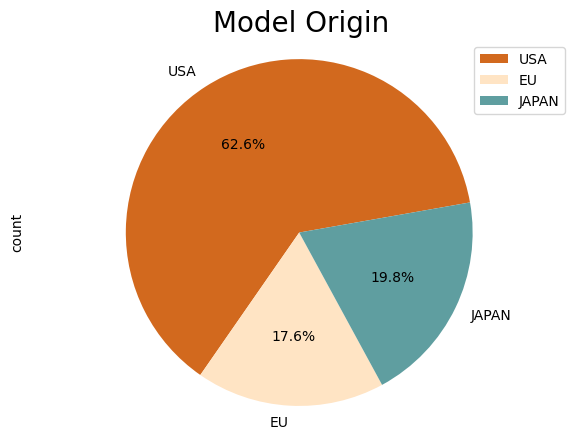

In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# read_csv() 함수로 df 생성
df = pd.read_csv(r"C:\Users\구남이\Downloads\5674-833_4th\part4\auto-mpg.csv", header=None)

plt.style.use('default')   # 스타일 서식 지정

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   #  숫자를 %로 나타내는데, 소수점 이하 첫째자리까지 표기
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

__7. 박스 플롯__

박스 플롯은 범주형 데이터의 분포를 파악하는데 적합하다. 박스 플롯은 5개의 통계 지표(최소값, 1분위값, 중간값, 3분위값, 최대값)를 제공한다.

![박스플롯](https://doc.arcgis.com/ko/insights/3.4/create/GUID-9C5007A4-23FA-4078-9C26-0B2B05D97164-web.png)

add_subplot() : 그림틀을 n개의 axe 객체로 분할

boxplot() : axe 객체에 박스 플롯 그리기

labels 옵션 : 각 열을 나타내는 라벨

vert옵션 : 수직 박스 플롯 (vert=True), 수평 박스 플롯 (vert=False)


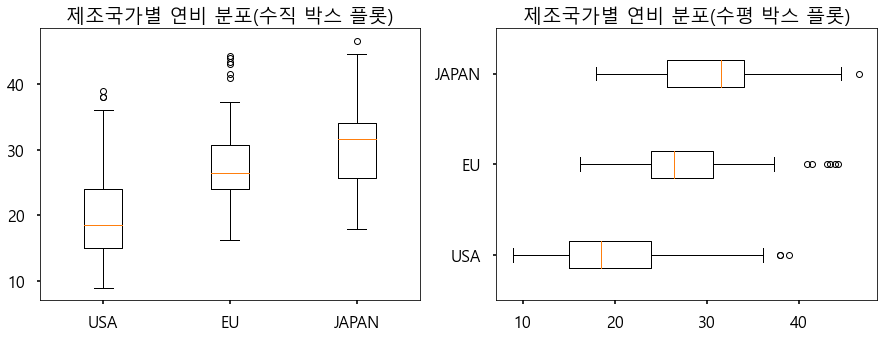

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = r"C:\Users\구남이\Downloads\5674-833_4th\part4\malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df = pd.read_csv(r"C:\Users\구남이\Downloads\5674-833_4th\part4\auto-mpg.csv", header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

> 파이썬 그래프 갤러리
> https://python-graph-gallery.com
> 위 사이트에는 파이썬으로 그릴 수 있는 다양한 그래프와 설정 옵션이 있다.